In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

# Preparing The Data

In [2]:
# import pathlib
# dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
# data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, untar=True)
# data_dir = pathlib.Path(data_dir)

In [3]:
os.listdir()
os.chdir("Train")

FileNotFoundError: [WinError 2] The system cannot find the file specified: 'New_train'

In [3]:
data_dir = os.getcwd()
print(os.getcwd())

c:\Users\VICTUS\Documents\GitHub\ML_FASTYFOOD-\Train


In [4]:
img_height,img_width=224,224
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 29212 files belonging to 20 classes.
Using 23370 files for training.


In [25]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 14223 files belonging to 10 classes.
Using 2844 files for validation.


In [26]:
class_names = train_ds.class_names
print(class_names)

['1_Baked Potato', '1_Burger', '1_Crispy Chicken', '1_Donut', '1_Fries', '1_Hot Dog', '1_Pizza', '1_Sandwich', '1_Taco', '1_Taquito']


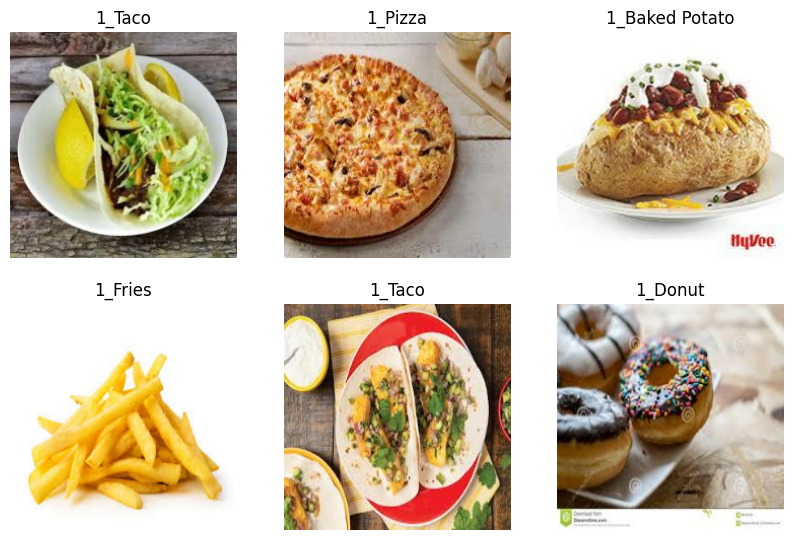

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Training The Model


In [38]:
resnet_model = Sequential()

# pretrained_model= tf.keras.applications.ResNet50(include_top=False,
#                    input_shape=(180,180,3),
#                    pooling='avg',classes=5,
#                    weights='imagenet')

pretrained_model = tf.keras.applications.VGG16(
                        include_top=True,
                        weights="imagenet",
                        input_tensor=None,
                        input_shape=(224,224,3),
                        pooling='avg',
                        classes=1000,
                        classifier_activation="softmax",
                        )

for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(1, activation='softmax'))

In [39]:
resnet_model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1000)              138357544 
                                                                 
 module_wrapper_12 (ModuleWr  (None, 1000)             0         
 apper)                                                          
                                                                 
 module_wrapper_13 (ModuleWr  (None, 512)              512512    
 apper)                                                          
                                                                 
 module_wrapper_14 (ModuleWr  (None, 1)                513       
 apper)                                                          
                                                                 
Total params: 138,870,569
Trainable params: 513,025
Non-trainable params: 138,357,544
__________________________________

In [40]:
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [42]:
epochs=10
history = resnet_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
 97/356 [=======>......................] - ETA: 8:31 - loss: 0.0000e+00 - accuracy: 0.1015

InvalidArgumentError: Graph execution error:

Unknown image file format. One of JPEG, PNG, GIF, BMP required.
	 [[{{node decode_image/DecodeImage}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_5554]

# Evaluating The Model

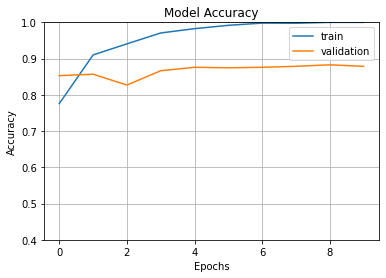

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

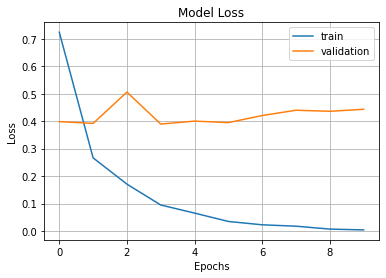

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.grid()
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

# Making Predictions

In [ ]:
import cv2
image=cv2.imread(str(roses[0]))
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)
print(image.shape)


(1, 180, 180, 3)


In [45]:
pred=resnet_model.predict(image)
print(pred)

[[8.2068445e-06 1.5209365e-06 9.9347222e-01 9.5006551e-05 6.4231041e-03]]


In [ ]:
output_class=class_names[np.argmax(pred)]
print("The predicted class is", output_class)

The predicted class is roses
